In [1]:
import os
import shutil

import re
import time
import pandas as pd
import numpy as np

import pprint
from ast import literal_eval


Corpus = pd.read_excel('CorpusBeta.xlsx', header=0)

Corpus['From-->Too'] = Corpus['From-->Too'].apply(literal_eval)
Corpus['Method Used'] = Corpus['Method Used'].apply(literal_eval)

print('la taille de la corpus : '+str(len(Corpus)))
Corpus

la taille de la corpus : 2014


,Title,Abstract,Author Keywords,Link,Year,Cited by,Page start,Page end,Page count,DOI,Authors,Document Type,Source,From-->Too,Method Used,is it a survey?
0,"Matching graph, a method for extracting parall...",Comparable corpora are valuable alternatives f...,And Arabic languages; Comparable corpora; Engl...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3329713,"Bakhshaei S., Safabakhsh R., Khadivi S.",Article,Scopus,"[persian, arabic, english]",[statistical],[]
1,Machine translation errors: English and Iraqi ...,Errors in machine translations of English-Iraq...,Arabic; English; Error analysis; Evaluation; S...,https://www.scopus.com/inward/record.uri?eid=2...,2011,1.0,NaN,NaN,1,10.1145/1929908.1929910,"Condon S., Parvaz D., Aberdeen J., Doran C., F...",Article,Scopus,"[arabic, english]",[statistical],[]
2,An automatic and a machine-assisted method to ...,Two different methods of corpus cleaning are p...,Bilingual corpus cleaning; Statistical machine...,https://www.scopus.com/inward/record.uri?eid=2...,2019,NaN,NaN,NaN,1,10.1145/3342351,"Srivastava J., Sanyal S., Srivastava A.K.",Article,Scopus,"[hindi, english]",[statistical],[]
3,Combining MEDLINE and publisher data to create...,Background: Most of the institutional and rese...,Biomedical domain; Multilingual corpus generat...,https://www.scopus.com/inward/record.uri?eid=2...,2013,14.0,NaN,NaN,1,10.1186/1471-2105-14-146,"Jimeno Yepes A., Prieur-Gaston É., Névéol A.",Article,Scopus,"[spanish, french, english]",[statistical],[]
4,Syntax-based Chinese-Vietnamese tree-to-tree s...,"Because of the scarcity of bilingual corpora, ...",Chinese-Vietnamese; Linguistic features; Pruni...,https://www.scopus.com/inward/record.uri?eid=2...,2019,1.0,NaN,NaN,1,10.1145/3314938,"Gao S., Huang J., Xue M., Yu Z., Wang Z., Zhan...",Article,Scopus,"[vietnamese, chinese]",[statistical],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2009,Machine translation architecture based on micr...,This paper surveys current approaches of multi...,Machine translation; Micro-engine pipeline; Mu...,https://www.scopus.com/inward/record.uri?eid=2...,2004,NaN,651,658,8,NaN,Liu Q.,Article,Scopus,"[chinese, english]",[],[]
2010,Uyghur-Chinese translation disambiguation meth...,This thesis studies the disambiguation method ...,Knowledge automatic-acquisition; Uyghur-chines...,https://www.scopus.com/inward/record.uri?eid=2...,2015,NaN,NaN,NaN,6,NaN,"Ge R., Yong Y., Chun X.",Article,Scopus,"[uyghur, chinese]",[],[]
2011,Application and analysis of string-similarity-...,To help developing a localization-oriented exa...,Correlation; Linear regression; Machine transl...,https://www.scopus.com/inward/record.uri?eid=2...,2004,NaN,1258,1265,8,NaN,"Yao J.-M., Zhou M., Zhao T.-J., Li S.",Article,Scopus,[],[],[]
2012,A comparative study on applying hierarchical p...,To set an appropriate goal of SMT research for...,Hierarchical phrase-based translation; SMT; Th...,https://www.scopus.com/inward/record.uri?eid=2...,2012,1.0,126,133,8,10.1109/KICSS.2012.23,"Luekhong P., Sukhauta R., Porkaew P., Ruangraj...",Conference Paper,Scopus,"[chinese, thai]",[],[]


In [2]:
Corpus.drop(Corpus.index[Corpus['Year'] == 2021.0], inplace = True)
Corpus.drop(Corpus.index[Corpus['Year'] == 2022.0], inplace = True)

#Corpus['Year'] = Corpus['Year'].astype(int)


groupedCorpus = Corpus.groupby('Year')
gr_Corpus = groupedCorpus.count()

df = pd.DataFrame()

df['YEAR'] = gr_Corpus.index.values
df['Count'] = gr_Corpus['Title'].values

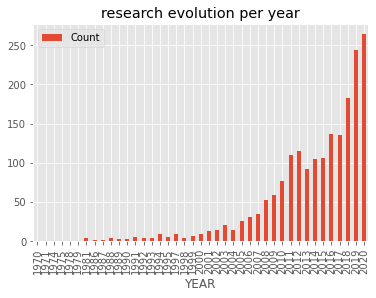

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.style.use('ggplot')
#figure(figsize = (25, 18), dpi = 100)
#Get current axis 
#fig = plt.gcf() # get current figure
# line plot for math marks 
df.plot(kind = 'bar', 
        x = 'YEAR')

# set the title 
plt.title('research evolution per year') 
plt.savefig('media/NumberOfArticlesPerYear.png', dpi = 500)
  
# show the plot 
plt.show() 

In [5]:
Corpus['Document Type'].value_counts()

Conference Paper    977
Article             746
IEEE Conferences    124
Book Chapter         30
IEEE Journals        29
Review                9
TUP Journals          1
IET Conferences       1
Name: Document Type, dtype: int64

In [6]:
Corpus['Document Type'] = Corpus['Document Type'].replace(['Article','IEEE Journals','TUP Journals','Journals'],'Journal')
Corpus['Document Type'] = Corpus['Document Type'].replace(['IET Conferences','IEEE Conferences'],'Conference Paper')
Corpus['Document Type'].value_counts()

Conference Paper    1102
Journal              776
Book Chapter          30
Review                 9
Name: Document Type, dtype: int64

<AxesSubplot:ylabel='Document Type'>

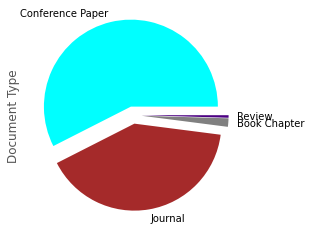

In [22]:
colors = ( "cyan", "brown","grey", "indigo", "beige")
explode = (0.1, 0.1, 0.1,0.1)
Corpus['Document Type'].value_counts().plot(kind='pie',colors = colors,explode = explode)